In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns',None)

data = pd.read_excel('nba_players_data.xlsx')

In [3]:
data.sample(10)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
4998,2020-21,Playoffs,202083,128,Wesley Matthews,1610612747,LAL,6,110,10,33,0.303,7,25,0.280,6,6,1.000,5,5,10,2,2,0,0,13,33,24,0.00,0.00
5195,2021-22,Regular%20Season,1628420,87,Monte Morris,1610612743,DEN,75,2239,374,773,0.484,124,314,0.395,73,84,0.869,27,199,226,333,56,14,78,92,945,1086,4.27,0.72
3408,2018-19,Playoffs,1626172,37,Kevon Looney,1610612744,GSW,21,431,64,93,0.688,0,0,0.000,21,29,0.724,41,53,94,20,12,11,13,50,149,236,1.54,0.92
2494,2017-18,Regular%20Season,203585,403,Rodney McGruder,1610612748,MIA,18,299,36,73,0.493,15,35,0.429,4,8,0.500,11,22,33,17,8,3,4,21,91,107,4.25,2.00
1942,2016-17,Playoffs,2403,64,Nene,1610612745,HOU,9,161,36,51,0.706,0,1,0.000,18,31,0.581,11,31,42,5,6,4,9,24,90,110,0.56,0.67
1435,2016-17,Regular%20Season,200755,45,JJ Redick,1610612746,LAC,78,2198,396,890,0.445,201,468,0.429,180,202,0.891,11,160,171,110,54,13,98,125,1173,907,1.12,0.55
6623,2022-23,Playoffs,202083,153,Wesley Matthews,1610612749,MIL,2,41,4,9,0.444,4,7,0.571,0,0,0.000,1,2,3,1,2,1,0,3,12,14,0.00,0.00
3927,2019-20,Regular%20Season,1628963,344,Marvin Bagley III,1610612758,SAC,13,334,78,167,0.467,4,22,0.182,25,31,0.806,29,68,97,10,6,12,18,43,185,197,0.56,0.33
7213,2023-24,Regular%20Season,1629232,522,Kaiser Gates,1610612740,NOP,1,7,0,4,0.000,0,2,0.000,0,0,0.000,0,1,1,0,0,0,0,0,0,-3,0.00,0.00
4451,2020-21,Regular%20Season,1629652,122,Luguentz Dort,1610612760,OKC,52,1543,247,639,0.387,113,329,0.343,122,164,0.744,38,151,189,88,45,19,79,134,729,557,1.11,0.57


In [4]:
data.shape

(7224, 30)

## Data Analysis

In [5]:
data.isna().sum()

Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
EFF            0
AST_TOV        0
STL_TOV        0
dtype: int64

In [6]:
data.drop(columns=['RANK','EFF'], inplace=True)

In [7]:
data['TEAM'].replace(to_replace=['NOP','NOH'], value='NO', inplace=True)

In [8]:
data['Year'].str[:4].astype(int)

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
7219    2023
7220    2023
7221    2023
7222    2023
7223    2023
Name: Year, Length: 7224, dtype: int32

In [9]:
 data['season_start_year'] = data['Year'].str[:4].astype(int)

In [10]:
data.TEAM.unique()

array(['HOU', 'GSW', 'OKC', 'CLE', 'POR', 'NO', 'LAC', 'DAL', 'UTA',
       'CHI', 'SAC', 'ORL', 'MEM', 'MIN', 'WAS', 'PHX', 'MIA', 'TOR',
       'BKN', 'ATL', 'DEN', 'DET', 'BOS', 'CHA', 'SAS', 'MIL', 'NYK',
       'PHI', 'IND', 'LAL'], dtype=object)

In [11]:
data.TEAM.nunique()

30

In [12]:
 data['Season_type'].replace('Regular%20Season','RS', inplace=True)

In [13]:
 rs_df = data[data['Season_type']=='RS']
playoffs_df = data[data['Season_type']=='Playoffs']

In [14]:
  total_cols = ['MIN','FGM','FGA','FG3M','FG3A','FTM','FTA',
              'OREB','DREB','REB','AST','STL','BLK','TOV','PF','PTS']

In [15]:
data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'season_start_year'],
      dtype='object')

In [16]:
data.corr(numeric_only=True)

,PLAYER_ID,TEAM_ID,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,AST_TOV,STL_TOV,season_start_year
PLAYER_ID,1.000000,0.033575,-0.119456,-0.162634,-0.141873,-0.145702,-0.046256,-0.082035,-0.078484,-0.008047,-0.150019,-0.151875,-0.109159,-0.109912,-0.156640,-0.148810,-0.135265,-0.145904,-0.102621,-0.154991,-0.141904,-0.142836,-0.030511,0.004158,0.522994
TEAM_ID,0.033575,1.000000,0.019021,0.009486,0.003464,0.008297,-0.025670,-0.017602,-0.014214,-0.017865,0.007280,0.008583,-0.005658,0.011184,0.001657,0.004369,-0.004141,0.008992,0.010280,0.003419,0.013666,0.001873,-0.001289,0.021255,0.004495
GP,-0.119456,0.019021,1.000000,0.907242,0.785030,0.791830,0.220367,0.640553,0.663913,0.214713,0.629133,0.649477,0.353079,0.631969,0.778727,0.763661,0.641628,0.793582,0.584382,0.746314,0.899193,0.772622,0.140766,0.067941,-0.093905
MIN,-0.162634,0.009486,0.907242,1.000000,0.931808,0.937689,0.200566,0.757677,0.778310,0.235934,0.791924,0.804190,0.343118,0.648199,0.863403,0.832060,0.782064,0.891649,0.615610,0.879963,0.918760,0.925742,0.151430,0.022777,-0.075129
FGM,-0.141873,0.003464,0.785030,0.931808,1.000000,0.988873,0.212604,0.742857,0.759899,0.218195,0.895046,0.898652,0.315865,0.621688,0.849106,0.813882,0.800472,0.826520,0.593338,0.918302,0.829154,0.994106,0.110229,-0.051543,-0.032219
FGA,-0.145702,0.008297,0.791830,0.937689,0.988873,1.000000,0.160471,0.798843,0.821098,0.244652,0.886225,0.881306,0.332753,0.549920,0.811749,0.765688,0.818309,0.840381,0.533224,0.922310,0.818795,0.990918,0.129581,-0.043599,-0.047251
FG_PCT,-0.046256,-0.025670,0.220367,0.200566,0.212604,0.160471,1.000000,0.029972,0.018762,0.172806,0.170238,0.195325,0.196637,0.325982,0.263902,0.289980,0.108616,0.153833,0.286858,0.168595,0.247888,0.192134,0.030845,0.061315,0.026120
FG3M,-0.082035,-0.017602,0.640553,0.757677,0.742857,0.798843,0.029972,1.000000,0.991971,0.369321,0.613028,0.571635,0.333385,0.167805,0.512138,0.433116,0.648098,0.675628,0.228744,0.668914,0.600343,0.781511,0.173807,0.025162,0.055227
FG3A,-0.078484,-0.014214,0.663913,0.778310,0.759899,0.821098,0.018762,0.991971,1.000000,0.353449,0.637899,0.599210,0.339496,0.184159,0.532997,0.453412,0.673434,0.700463,0.244097,0.698725,0.624145,0.797902,0.176925,0.025157,0.051998
FG3_PCT,-0.008047,-0.017865,0.214713,0.235934,0.218195,0.244652,0.172806,0.369321,0.353449,1.000000,0.158551,0.131010,0.291776,-0.057460,0.110905,0.067633,0.214082,0.215546,-0.011971,0.186269,0.166977,0.234271,0.243417,0.115861,0.075214


## correlation of player stats

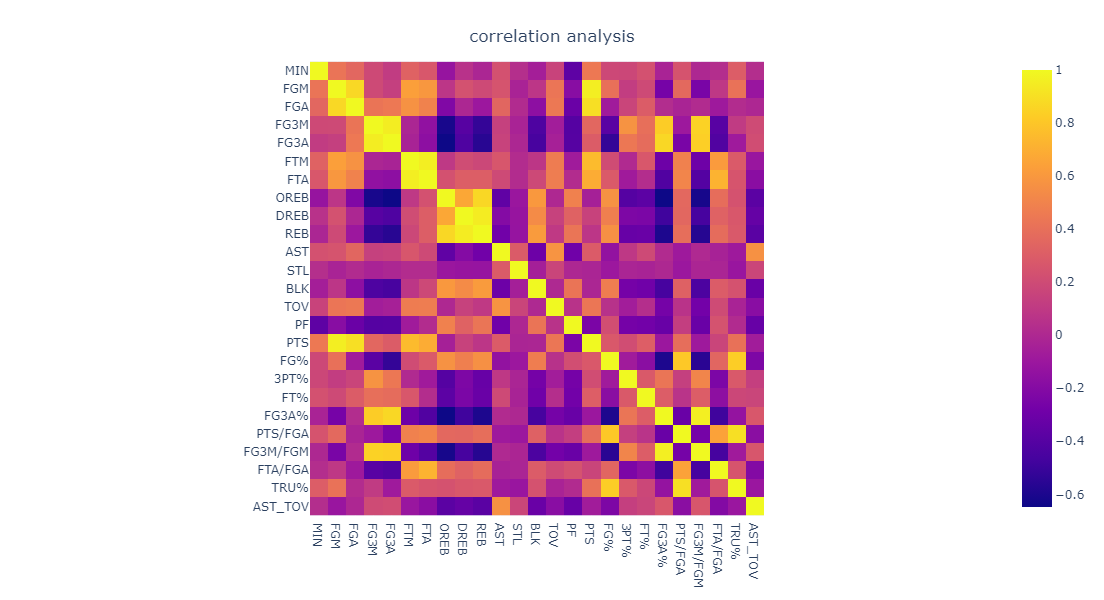

In [59]:
data_per_min = data.groupby(['PLAYER','PLAYER_ID','Year'])[total_cols].sum().reset_index()
for col in data_per_min.columns[4:]:
    data_per_min[col] = data_per_min[col]/data_per_min['MIN'] 

data_per_min['FG%'] = data_per_min['FGM']/data_per_min['FGA'] 
data_per_min['3PT%'] = data_per_min['FG3M']/data_per_min['FG3A'] 
data_per_min['FT%'] = data_per_min['FTM']/data_per_min['FTA'] 
data_per_min['FG3A%'] = data_per_min['FG3A']/data_per_min['FGA'] 
data_per_min['PTS/FGA'] = data_per_min['PTS']/data_per_min['FGA'] 
data_per_min['FG3M/FGM'] = data_per_min['FG3M']/data_per_min['FGM'] 
data_per_min['FTA/FGA'] = data_per_min['FTA']/data_per_min['FGA'] 
data_per_min['TRU%'] = 0.5*data_per_min['PTS']/(data_per_min['FGA']+0.475*data_per_min['FTA'])
data_per_min['AST_TOV'] = data_per_min['AST']/data_per_min['TOV'] 

data_per_min=data_per_min[data_per_min['MIN']>=50]
data_per_min.drop(columns='PLAYER_ID',inplace= True)

fig = px.imshow(data_per_min.corr(numeric_only=True))
fig.update_layout(height=600, width=800)
fig.update_layout(title_text='correlation analysis', title_x=0.5, title_y=0.95)
fig.show() 

## minutes played by a player

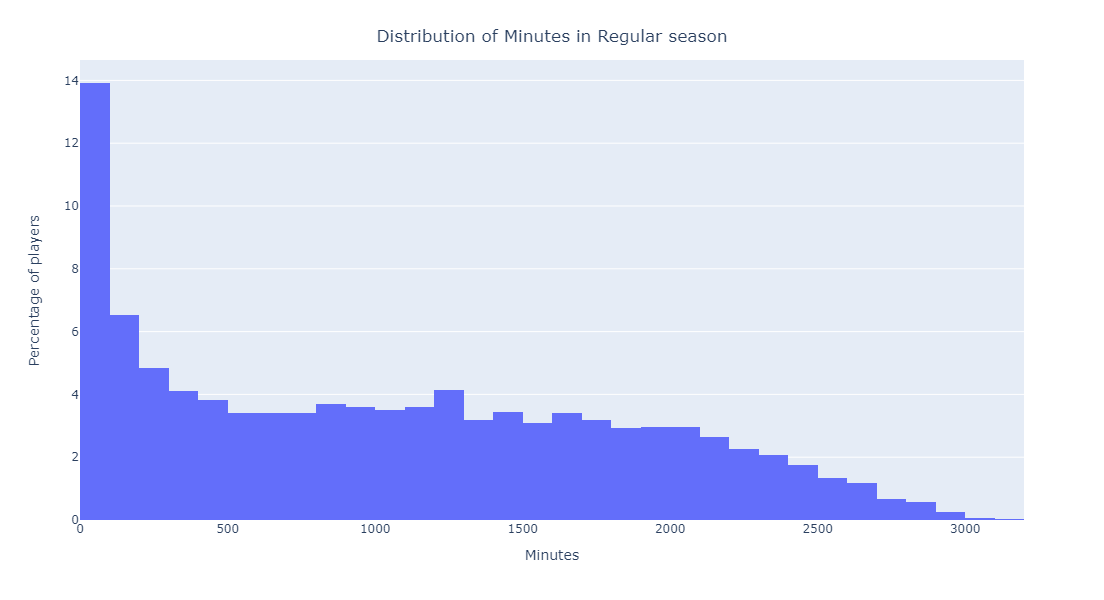

In [43]:
fig = px.histogram(x=rs_df['MIN'],histnorm='percent')
fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text='Minutes')
fig.update_yaxes(title_text='Percentage of players')
fig.update_layout(title_text='Distribution of Minutes in Regular season', title_x=0.5, title_y=0.95)

fig.show()

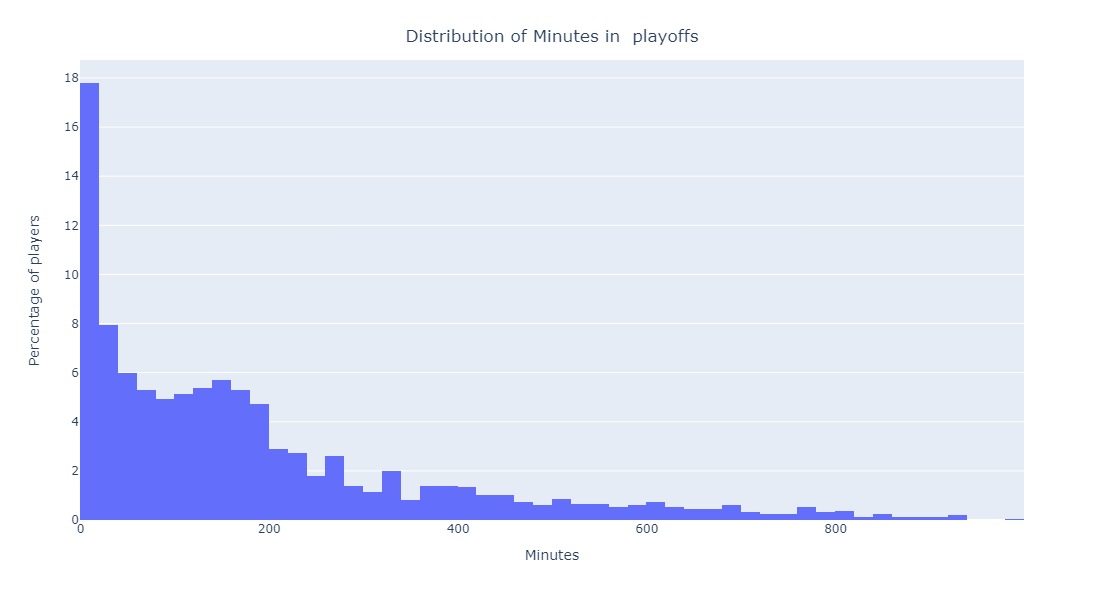

In [42]:
fig = px.histogram(x=playoffs_df['MIN'],histnorm='percent')
fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text='Minutes')
fig.update_yaxes(title_text='Percentage of players')
fig.update_layout(title_text='Distribution of Minutes in  playoffs', title_x=0.5, title_y=0.95)
fig.show()

## comparison of playoffs and regular season

In [48]:
 def hist_data(df=rs_df, min_MIN=0, min_GP=0):
    return df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'MIN']/\
    df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'GP']

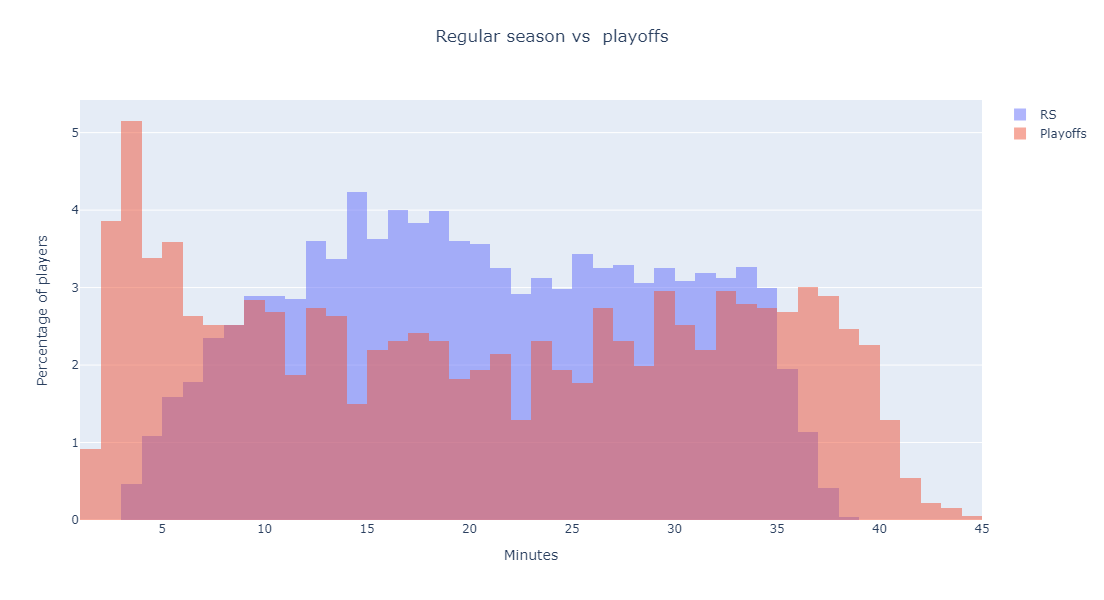

In [50]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=hist_data(rs_df,50,5), histnorm='percent', name='RS',
                           xbins={'start':0,'end':46,'size':1}))
fig.add_trace(go.Histogram(x=hist_data(playoffs_df,5,1), histnorm='percent',
                           name='Playoffs', xbins={'start':0,'end':46,'size':1}))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text='Minutes')
fig.update_yaxes(title_text='Percentage of players')
fig.update_layout(title_text=' Regular season vs  playoffs', title_x=0.5, title_y=0.95)
fig.show()

In [22]:
((hist_data(playoffs_df,5,1)>=12)&(hist_data(playoffs_df,5,1)<=34)).mean()

0.5016094420600858

In [23]:
((hist_data(rs_df,5,1)>=12)&(hist_data(rs_df,5,1)<=34)).mean()

0.7008055235903338

In [52]:
def hist_data(df=rs_df, min_MIN=0, min_GP=0):
    return df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'PTS']/\
    df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'GP']

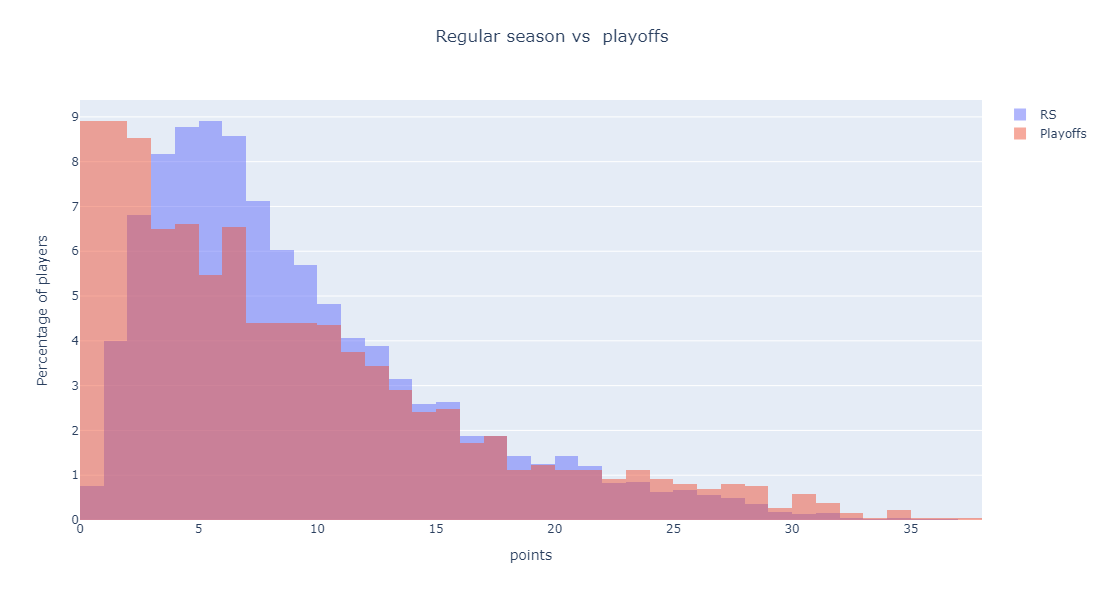

In [54]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=hist_data(rs_df,50,5), histnorm='percent', name='RS',
                           xbins={'start':0,'end':38,'size':1}))
fig.add_trace(go.Histogram(x=hist_data(playoffs_df,5,1), histnorm='percent',
                           name='Playoffs', xbins={'start':0,'end':38,'size':1}))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text='points')
fig.update_yaxes(title_text='Percentage of players')
fig.update_layout(title_text=' Regular season vs  playoffs', title_x=0.5, title_y=0.95)
fig.show()

## How has the game changed over the past 10 years

In [26]:
change_df = data.groupby('season_start_year')[total_cols].sum().reset_index()
change_df['POSS_est'] = change_df['FGA']-change_df['OREB']+change_df['TOV']+0.44*change_df['FTA']
change_df = change_df[list(change_df.columns[0:2])+['POSS_est']+list(change_df.columns[2:-1])]

change_df['FG%'] = change_df['FGM']/change_df['FGA']
change_df['3PT%'] = change_df['FG3M']/change_df['FG3A']
change_df['FT%'] = change_df['FTM']/change_df['FTA']
change_df['AST%'] = change_df['AST']/change_df['FGM']
change_df['FG3A%'] = change_df['FG3A']/change_df['FGA']
change_df['PTS/FGA'] = change_df['PTS']/change_df['FGA']
change_df['FG3M/FGM'] = change_df['FG3M']/change_df['FGM']
change_df['FTA/FGA'] = change_df['FTA']/change_df['FGA']
change_df['TRU%'] = 0.5*change_df['PTS']/(change_df['FGA']+0.475*change_df['FTA'])
change_df['AST_TOV'] = change_df['AST']/change_df['TOV']

change_df

,season_start_year,MIN,POSS_est,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2014,634546,253004.12,98251,219265,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324,0.448092,0.349619,0.748539,0.587546,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
1,2015,636391,258064.80,100351,222344,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742,0.451332,0.353745,0.756112,0.580473,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
2,2016,632482,258443.80,102147,223333,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508,0.457375,0.357768,0.772121,0.579185,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
3,2017,633425,260904.52,103729,225523,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709,0.459949,0.361073,0.766927,0.585555,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
4,2018,634231,268739.84,107374,233717,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236,0.459419,0.354361,0.767476,0.598441,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
5,2019,552262,234384.64,92997,202223,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,0.459874,0.358104,0.773995,0.596202,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
6,2020,562518,235759.48,95849,205754,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,0.465843,0.366372,0.778208,0.597930,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
7,2021,635572,264004.96,106569,231293,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,0.460753,0.353671,0.775269,0.606349,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960
8,2022,635386,266600.04,110010,231870,32382,89926,48136,61516,27403,86695,114098,66265,19078,12250,35066,52438,300538,0.474447,0.360096,0.782496,0.602354,0.387829,1.296149,0.294355,0.265304,0.575545,1.889722
9,2023,371280,156088.16,65321,137188,19772,53801,27415,34964,16386,50546,66932,41015,11358,7950,19902,29883,177829,0.476142,0.367502,0.784092,0.627899,0.392170,1.296243,0.302690,0.254862,0.578133,2.060848


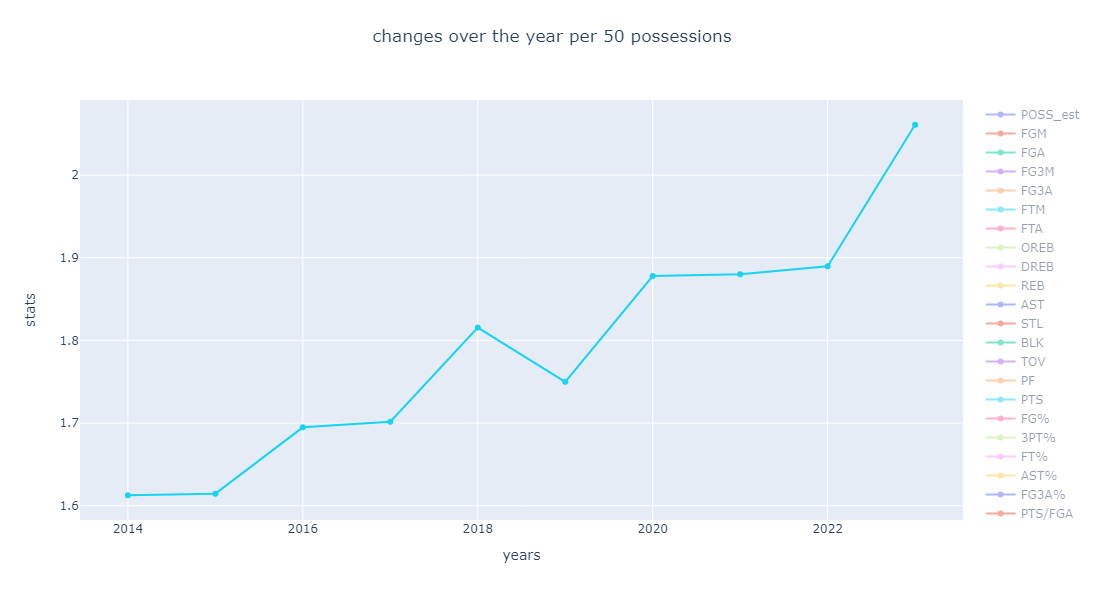

In [57]:
change_per48_df = change_df.copy()
for col in change_per48_df.columns[2:18]:
    change_per48_df[col] = (change_per48_df[col]/change_per48_df['MIN'])*48*5

change_per48_df.drop(columns='MIN', inplace=True)

fig = go.Figure()
for col in change_per48_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per48_df['season_start_year'],
                             y=change_per48_df[col], name=col))

fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text='years')
fig.update_yaxes(title_text='stats')
fig.update_layout(title_text='changes over the year per 50 possessions', title_x=0.5, title_y=0.95)
fig.show()

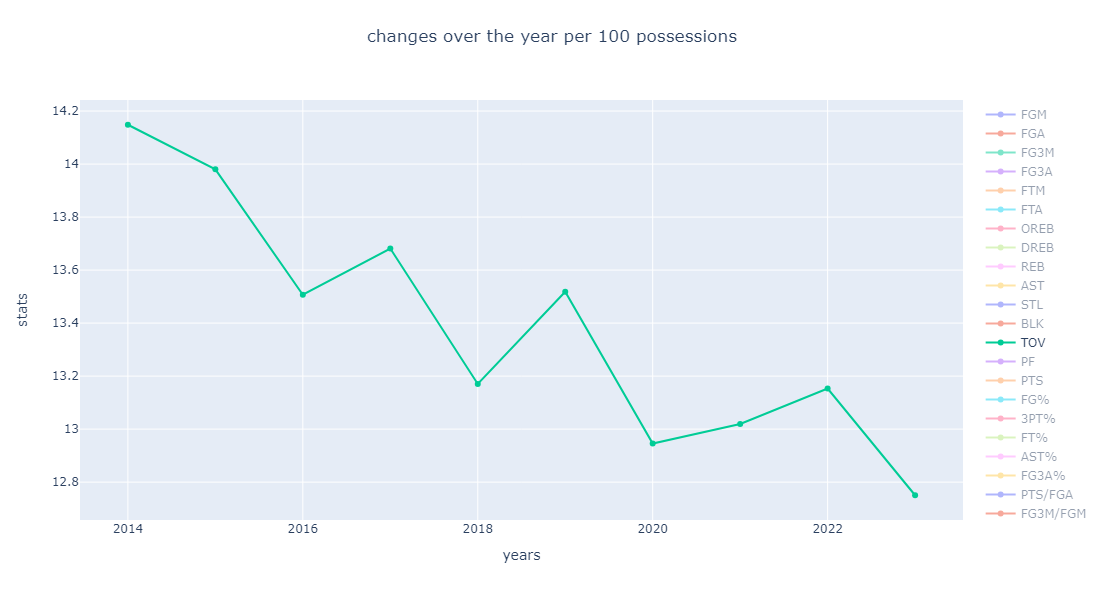

In [58]:
change_per100_df = change_df.copy()

for col in change_per100_df.columns[3:18]:
    change_per100_df[col] = (change_per100_df[col]/change_per100_df['POSS_est'])*100

change_per100_df.drop(columns=['MIN','POSS_est'], inplace=True)
change_per100_df

fig = go.Figure()
for col in change_per100_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per100_df['season_start_year'],
                             y=change_per100_df[col], name=col))

fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text='years')
fig.update_yaxes(title_text='stats')
fig.update_layout(title_text='changes over the year per 100 possessions', title_x=0.5, title_y=0.95)
fig.show()

## comparing regular season to playoffs

In [29]:
rs_change_df = rs_df.groupby('season_start_year')[total_cols].sum().reset_index()
playoffs_change_df = playoffs_df.groupby('season_start_year')[total_cols].sum().reset_index()

for i in [rs_change_df,playoffs_change_df]:
    i['POSS_est'] = i['FGA']-i['OREB']+i['TOV']+0.44*i['FTA']
    i['POSS_per_48'] = (i['POSS_est']/i['MIN'])*48*5
    
    i['FG%'] = i['FGM']/i['FGA']
    i['3PT%'] = i['FG3M']/i['FG3A']
    i['FT%'] = i['FTM']/i['FTA']
    i['AST%'] = i['AST']/i['FGM']
    i['FG3A%'] = i['FG3A']/i['FGA']
    i['PTS/FGA'] = i['PTS']/i['FGA']
    i['FG3M/FGM'] = i['FG3M']/i['FGM']
    i['FTA/FGA'] = i['FTA']/i['FGA']
    i['TRU%'] = 0.5*i['PTS']/(i['FGA']+0.475*i['FTA'])
    i['AST_TOV'] = i['AST']/i['TOV']
    for col in total_cols:
        i[col] = 100*i[col]/i['POSS_est']
    i.drop(columns=['MIN','POSS_est'], inplace=True)
    
rs_change_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2014,38.900086,86.650240,8.135183,23.240912,17.771371,23.688136,11.288515,33.604208,44.892723,22.846798,8.021797,4.972578,14.215495,20.960953,103.706727,95.659492,0.448932,0.350037,0.750222,0.587320,0.268215,1.196843,0.209130,0.273376,0.529645,1.607176
1,2015,38.926558,86.096120,8.670900,24.515476,17.996886,23.782176,10.603882,33.942436,44.546317,22.690502,7.988086,5.045782,14.043605,20.630890,104.520902,97.493488,0.452129,0.353691,0.756738,0.582905,0.284745,1.214002,0.222750,0.276228,0.536595,1.615718
2,2016,39.516445,86.434227,9.769173,27.323490,18.052073,23.388341,10.257879,33.777035,44.034914,22.896756,7.795428,4.800256,13.532781,20.136476,106.854135,98.151085,0.457185,0.357538,0.771841,0.579423,0.316119,1.236248,0.247218,0.270591,0.547724,1.691948
3,2017,39.782703,86.439951,10.536996,29.127708,16.700692,21.772593,9.754285,33.953813,43.708098,23.339648,7.750757,4.836313,13.734393,19.940143,106.803093,98.979263,0.460235,0.361752,0.767051,0.586678,0.336970,1.235576,0.264864,0.251881,0.551772,1.699358
4,2018,40.060963,86.993122,11.081358,31.213318,17.241016,22.498864,10.089962,33.952838,44.042800,23.975453,7.443993,4.830132,13.197341,20.384863,108.444300,101.847754,0.460507,0.355020,0.766306,0.598474,0.358802,1.246585,0.276612,0.258628,0.555099,1.816688
5,2019,39.741774,86.378550,11.875237,33.176460,17.368831,22.473502,9.798838,33.803237,43.602075,23.716035,7.438668,4.765339,13.531948,20.205627,108.727615,102.071250,0.460088,0.357942,0.772858,0.596753,0.384082,1.258734,0.298810,0.260175,0.560143,1.752596
6,2020,40.637565,87.183600,12.520406,34.156188,16.730698,21.517093,9.692393,33.988197,43.680589,24.457861,7.466502,4.804198,13.041271,19.021868,110.526234,100.810750,0.466115,0.366563,0.777554,0.601854,0.391773,1.267741,0.308099,0.246802,0.567359,1.875420
7,2021,40.444286,87.713064,12.383811,35.022979,16.859678,21.766578,10.288949,33.966643,44.255592,24.540976,7.597520,4.692395,12.998590,19.550702,110.132061,99.871250,0.461098,0.353591,0.774567,0.606785,0.399290,1.255595,0.306194,0.248157,0.561599,1.887972
8,2022,41.294479,86.867572,12.140801,33.658240,18.095028,23.147063,10.265233,32.468114,42.733347,24.905858,7.171547,4.578144,13.212954,19.655068,112.824787,100.886815,0.475373,0.360708,0.781742,0.603128,0.387466,1.298814,0.294005,0.266464,0.576446,1.884958
9,2023,41.848786,87.891356,12.667200,34.468341,17.563792,22.400162,10.497913,32.382982,42.880895,26.276817,7.276657,5.093275,12.750487,19.144950,113.928564,100.897324,0.476142,0.367502,0.784092,0.627899,0.392170,1.296243,0.302690,0.254862,0.578133,2.060848


In [31]:
comp_change_df = round(100*(playoffs_change_df-rs_change_df)/rs_change_df,3)
comp_change_df['season_start_year'] = list(range(2014,2024))
comp_change_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2014,-2.737,0.266,11.046,12.980,4.844,8.464,0.314,3.983,3.060,-2.120,-2.726,10.739,-7.577,7.261,-0.357,0.549,-2.995,-1.712,-3.337,0.634,12.681,-0.621,14.171,8.176,-1.546,5.905
1,2015,-1.639,1.134,10.359,10.117,2.449,3.754,3.511,0.314,1.075,-8.193,-3.999,2.971,-7.096,6.995,0.060,-2.678,-2.741,0.220,-1.257,-6.663,8.883,-1.061,12.198,2.591,-1.358,-1.181
2,2016,0.316,-0.384,10.680,9.586,5.468,4.854,-2.594,-2.346,-2.404,-0.377,-0.318,0.412,-3.207,6.163,2.134,-1.399,0.703,0.998,0.586,-0.691,10.008,2.527,10.331,5.257,1.917,2.924
3,2017,-1.036,-0.020,2.286,5.358,5.549,5.813,-3.358,1.676,0.552,-4.159,-3.315,2.308,-6.315,6.690,0.322,-2.014,-1.016,-2.916,-0.250,-3.156,5.379,0.341,3.356,5.834,-0.280,2.301
4,2018,-4.331,-0.476,2.026,5.065,11.887,9.381,0.737,2.060,1.757,-4.422,-5.300,0.441,-3.336,8.363,-1.103,-2.406,-3.874,-2.893,2.291,-0.094,5.567,-0.630,6.645,9.904,-1.696,-1.123
5,2019,-2.298,-1.639,10.056,9.412,8.292,6.206,-10.140,1.575,-1.058,-3.600,-5.432,-10.645,-1.416,7.634,0.743,-2.870,-0.670,0.588,1.964,-1.333,11.235,2.422,12.644,7.975,1.531,-2.215
6,2020,0.620,1.445,1.480,2.218,6.434,5.243,4.155,0.363,1.204,-8.586,-8.981,-6.774,-10.378,9.637,1.598,-3.038,-0.813,-0.722,1.132,-9.150,0.762,0.151,0.855,3.744,-0.241,1.999
7,2021,-3.008,-1.845,1.867,1.512,8.047,6.628,-6.394,-1.246,-2.443,-4.127,-4.031,-0.146,2.504,12.789,-0.768,-2.734,-1.186,0.350,1.331,-1.153,3.419,1.097,5.026,8.632,0.185,-6.468
8,2022,-1.187,1.956,0.728,3.468,-3.520,-5.069,2.113,2.513,2.417,-3.253,-3.485,5.898,-7.308,1.156,-1.355,-2.888,-3.083,-2.649,1.632,-2.091,1.484,-3.247,1.938,-6.889,-2.493,4.375
9,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


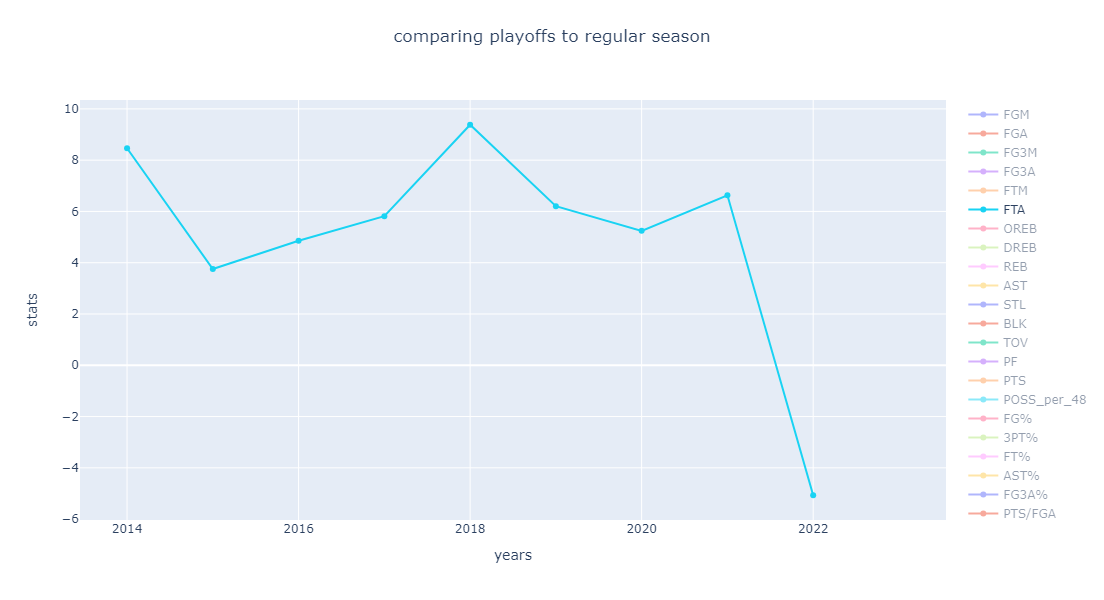

In [63]:
fig = go.Figure()
for col in comp_change_df.columns[1:]:
    fig.add_trace(go.Scatter(x=comp_change_df['season_start_year'],
                             y=comp_change_df[col], name=col))

fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text='years')
fig.update_yaxes(title_text='stats')
fig.update_layout(title_text='comparing playoffs to regular season', title_x=0.5, title_y=0.95)
fig.show()

In [64]:
comp_change_df = round(100*(rs_change_df-playoffs_change_df)/ playoffs_change_df,3)
comp_change_df['season_start_year'] = list(range(2014,2024))
comp_change_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2014,2.814,-0.265,-9.947,-11.489,-4.620,-7.803,-0.313,-3.830,-2.969,2.166,2.803,-9.697,8.198,-6.770,0.358,-0.546,3.087,1.742,3.453,-0.630,-11.254,0.625,-12.412,-7.558,1.570,-5.576
1,2015,1.666,-1.121,-9.386,-9.187,-2.391,-3.618,-3.391,-0.313,-1.064,8.924,4.165,-2.885,7.638,-6.538,-0.060,2.752,2.819,-0.219,1.273,7.139,-8.158,1.073,-10.872,-2.526,1.376,1.195
2,2016,-0.315,0.385,-9.649,-8.748,-5.184,-4.629,2.663,2.402,2.463,0.378,0.319,-0.410,3.313,-5.805,-2.090,1.419,-0.698,-0.988,-0.582,0.696,-9.098,-2.465,-9.363,-4.995,-1.881,-2.841
3,2017,1.047,0.020,-2.235,-5.085,-5.257,-5.493,3.475,-1.648,-0.549,4.340,3.429,-2.256,6.740,-6.271,-0.321,2.055,1.027,3.004,0.250,3.259,-5.104,-0.340,-3.247,-5.512,0.281,-2.249
4,2018,4.527,0.478,-1.986,-4.821,-10.624,-8.576,-0.732,-2.019,-1.727,4.626,5.596,-0.439,3.451,-7.717,1.116,2.465,4.030,2.979,-2.240,0.095,-5.274,0.634,-6.231,-9.011,1.725,1.136
5,2019,2.352,1.666,-9.137,-8.603,-7.657,-5.843,11.284,-1.551,1.069,3.734,5.744,11.913,1.436,-7.093,-0.738,2.955,0.674,-0.585,-1.926,1.351,-10.100,-2.365,-11.225,-7.386,-1.508,2.266
6,2020,-0.616,-1.424,-1.459,-2.170,-6.045,-4.982,-3.990,-0.362,-1.190,9.393,9.867,7.266,11.580,-8.790,-1.573,3.133,0.820,0.727,-1.119,10.071,-0.757,-0.150,-0.848,-3.609,0.242,-1.960
7,2021,3.102,1.879,-1.833,-1.489,-7.448,-6.216,6.830,1.262,2.504,4.304,4.200,0.146,-2.442,-11.339,0.774,2.811,1.200,-0.349,-1.314,1.166,-3.306,-1.085,-4.786,-7.946,-0.185,6.916
8,2022,1.201,-1.918,-0.723,-3.352,3.648,5.339,-2.069,-2.452,-2.360,3.362,3.611,-5.569,7.884,-1.143,1.374,2.974,3.181,2.721,-1.606,2.135,-1.462,3.356,-1.901,7.399,2.556,-4.192
9,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


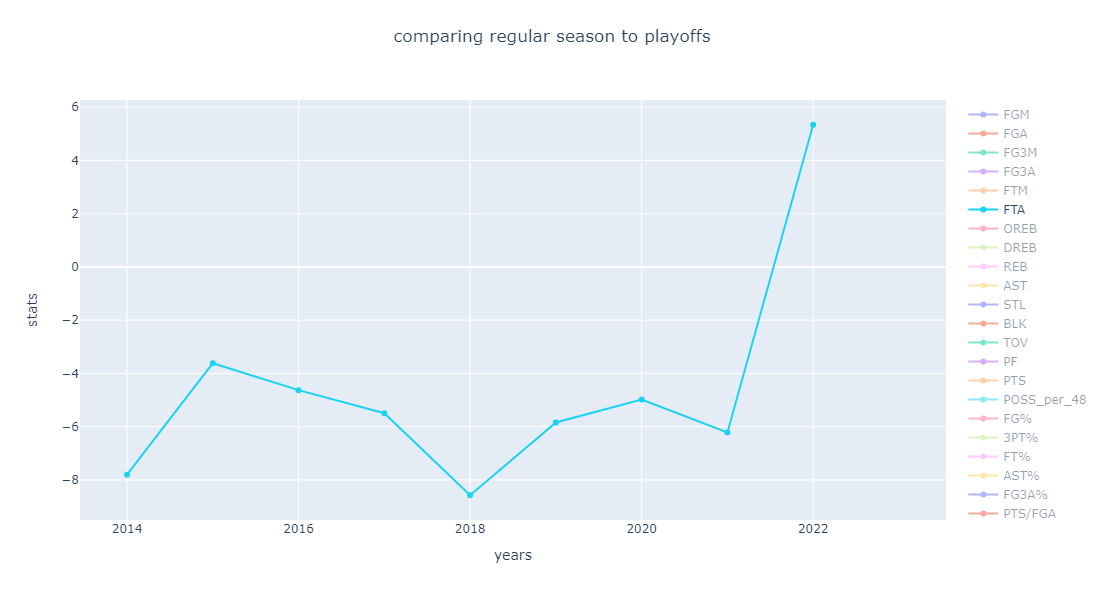

In [66]:
fig = go.Figure()
for col in comp_change_df.columns[1:]:
    fig.add_trace(go.Scatter(x=comp_change_df['season_start_year'],
                             y=comp_change_df[col], name=col))

fig.update_layout(height=600, width=800)
fig.update_xaxes(title_text='years')
fig.update_yaxes(title_text='stats')
fig.update_layout(title_text='comparing regular season to playoffs  ', title_x=0.5, title_y=0.95)
fig.show()